# Reconnaissance d’écriture par réseaux de neurones
## Chargement de la base de données digits disponible sous sklearn

In [84]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn import *
from sklearn.linear_model import *
from sklearn.neural_network import *
digits = load_digits()

## Affichage d'une image

<Figure size 432x288 with 0 Axes>

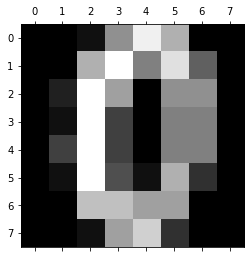

In [3]:
plt.gray()
plt.matshow(digits.images[10])
plt.show()

## Récupération des données et des labels

In [4]:
X = digits.data
y = digits.target

## Affichage du nombre d'exemples par classe

In [58]:
[print ("Il y a", digits.data[digits.target == a].shape[0], "exemples d'images de",a,"dans le dataset") for a in list(range(10))]


Il y a 178 exemples d'images de 0 dans le dataset
Il y a 182 exemples d'images de 1 dans le dataset
Il y a 177 exemples d'images de 2 dans le dataset
Il y a 183 exemples d'images de 3 dans le dataset
Il y a 181 exemples d'images de 4 dans le dataset
Il y a 182 exemples d'images de 5 dans le dataset
Il y a 181 exemples d'images de 6 dans le dataset
Il y a 179 exemples d'images de 7 dans le dataset
Il y a 174 exemples d'images de 8 dans le dataset
Il y a 180 exemples d'images de 9 dans le dataset


[None, None, None, None, None, None, None, None, None, None]

## Dimensionalité des données

In [75]:
print("les données ont", X.shape[1], "dimensions")
print("Chaque dimension correspond à un pixel, qui peut prendre les valeurs:",np.unique(X))

les données ont 64 dimensions
Chaque dimension correspond à un pixel, qui peut prendre les valeurs: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


## Séparation en base d'apprentissage et base de test

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

## Etude de l'influence du nombre de neurones de la couche cachée sur le résultat (attention, ce calcul prends approximativement 30 minutes d'éxécution)

Iteration 1, loss = 2.42375374
Iteration 2, loss = 2.29964088
Iteration 3, loss = 2.29594055
Iteration 4, loss = 2.29361386
Iteration 5, loss = 2.29169799
Iteration 6, loss = 2.29226893
Iteration 7, loss = 2.29256217
Iteration 8, loss = 2.29324091
Iteration 9, loss = 2.29202182
Iteration 10, loss = 2.29221219
Iteration 11, loss = 2.29367644
Iteration 12, loss = 2.29270532
Iteration 13, loss = 2.29389557
Iteration 14, loss = 2.29312271
Iteration 15, loss = 2.29246813
Iteration 16, loss = 2.29253885
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 17, loss = 2.28504954
Iteration 18, loss = 2.28432850
Iteration 19, loss = 2.28425582
Iteration 20, loss = 2.28413567
Iteration 21, loss = 2.28432375
Iteration 22, loss = 2.28415828
Iteration 23, loss = 2.28405715
Iteration 24, loss = 2.28403933
Iteration 25, loss = 2.28403484
Iteration 26, loss = 2.28399809
Iteration 27, loss = 2.28405099
Iteration 28, loss = 2.28396242

Iteration 47, loss = 2.24892445
Iteration 48, loss = 2.24910316
Iteration 49, loss = 2.24905134
Iteration 50, loss = 2.24898956
Iteration 51, loss = 2.24884759
Iteration 52, loss = 2.24904379
Iteration 53, loss = 2.24897068
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 54, loss = 2.24804248
Iteration 55, loss = 2.24797433
Iteration 56, loss = 2.24796231
Iteration 57, loss = 2.24793526
Iteration 58, loss = 2.24800895
Iteration 59, loss = 2.24798421
Iteration 60, loss = 2.24796654
Iteration 61, loss = 2.24800421
Iteration 62, loss = 2.24801180
Iteration 63, loss = 2.24795237
Iteration 64, loss = 2.24797857
Iteration 65, loss = 2.24797319
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 66, loss = 2.24775438
Iteration 67, loss = 2.24774142
Iteration 68, loss = 2.24774988
Iteration 69, loss = 2.24774117
Iteration 70, loss = 2.24773571
Iter

Iteration 64, loss = 2.22214716
Iteration 65, loss = 2.22209699
Iteration 66, loss = 2.22220447
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 67, loss = 2.22098037
Iteration 68, loss = 2.22091754
Iteration 69, loss = 2.22095659
Iteration 70, loss = 2.22084062
Iteration 71, loss = 2.22094271
Iteration 72, loss = 2.22090087
Iteration 73, loss = 2.22094888
Iteration 74, loss = 2.22091840
Iteration 75, loss = 2.22091401
Iteration 76, loss = 2.22092306
Iteration 77, loss = 2.22090333
Iteration 78, loss = 2.22092259
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000002
Iteration 79, loss = 2.22062743
Iteration 80, loss = 2.22059719
Iteration 81, loss = 2.22059820
Iteration 82, loss = 2.22060064
Iteration 83, loss = 2.22059680
Iteration 84, loss = 2.22059868
Iteration 85, loss = 2.22061126
Iteration 86, loss = 2.22059540
Iteration 87, loss = 2.22059253
Iter

Iteration 77, loss = 2.19228860
Iteration 78, loss = 2.19227694
Iteration 79, loss = 2.19228133
Iteration 80, loss = 2.19226419
Iteration 81, loss = 2.19229074
Iteration 82, loss = 2.19227794
Iteration 83, loss = 2.19227869
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000000
Iteration 84, loss = 2.19217847
Iteration 85, loss = 2.19217754
Iteration 86, loss = 2.19217638
Iteration 87, loss = 2.19217666
Iteration 88, loss = 2.19217503
Iteration 89, loss = 2.19217606
Iteration 90, loss = 2.19217495
Iteration 91, loss = 2.19217891
Iteration 92, loss = 2.19217713
Iteration 93, loss = 2.19218020
Iteration 94, loss = 2.19217748
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 2.78905808
Iteration 2, loss = 2.23547456
Iteration 3, loss = 2.24030029
Iteration 4, loss = 2.23400932
Iteration 5, loss = 2.23124385
Iteration 6, loss = 2.23729965
Iteration

Iteration 83, loss = 2.16754698
Iteration 84, loss = 2.16754562
Iteration 85, loss = 2.16754313
Iteration 86, loss = 2.16754474
Iteration 87, loss = 2.16754375
Iteration 88, loss = 2.16754561
Iteration 89, loss = 2.16754391
Iteration 90, loss = 2.16754406
Iteration 91, loss = 2.16754278
Iteration 92, loss = 2.16754204
Iteration 93, loss = 2.16754280
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 2.88312823
Iteration 2, loss = 2.22923200
Iteration 3, loss = 2.22109897
Iteration 4, loss = 2.21750645
Iteration 5, loss = 2.22144032
Iteration 6, loss = 2.22661584
Iteration 7, loss = 2.22287003
Iteration 8, loss = 2.22381341
Iteration 9, loss = 2.22084056
Iteration 10, loss = 2.22412869
Iteration 11, loss = 2.22088120
Iteration 12, loss = 2.21826704
Iteration 13, loss = 2.22044477
Iteration 14, loss = 2.22184207
Iteration 15, loss = 2.22207571
Training loss did not improve more than tol=0.000100 for 10 co

Iteration 1, loss = 2.90858224
Iteration 2, loss = 2.21780212
Iteration 3, loss = 2.21393132
Iteration 4, loss = 2.21602742
Iteration 5, loss = 2.21120231
Iteration 6, loss = 2.21295826
Iteration 7, loss = 2.21055037
Iteration 8, loss = 2.20877289
Iteration 9, loss = 2.21892766
Iteration 10, loss = 2.21139024
Iteration 11, loss = 2.20939388
Iteration 12, loss = 2.20612469
Iteration 13, loss = 2.20448021
Iteration 14, loss = 2.20587869
Iteration 15, loss = 2.21211560
Iteration 16, loss = 2.21216806
Iteration 17, loss = 2.21274565
Iteration 18, loss = 2.21083422
Iteration 19, loss = 2.20525275
Iteration 20, loss = 2.21336439
Iteration 21, loss = 2.21094761
Iteration 22, loss = 2.21451631
Iteration 23, loss = 2.20761061
Iteration 24, loss = 2.21351017
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 25, loss = 2.15595723
Iteration 26, loss = 2.15133331
Iteration 27, loss = 2.15278689
Iteration 28, loss = 2.15228315

Iteration 13, loss = 2.20053600
Iteration 14, loss = 2.20028318
Iteration 15, loss = 2.19626198
Iteration 16, loss = 2.20144327
Iteration 17, loss = 2.19736639
Iteration 18, loss = 2.20345086
Iteration 19, loss = 2.19506169
Iteration 20, loss = 2.19955686
Iteration 21, loss = 2.19888537
Iteration 22, loss = 2.19837092
Iteration 23, loss = 2.20481303
Iteration 24, loss = 2.20326973
Iteration 25, loss = 2.19849237
Iteration 26, loss = 2.19498867
Iteration 27, loss = 2.20330738
Iteration 28, loss = 2.19925137
Iteration 29, loss = 2.19790335
Iteration 30, loss = 2.20098058
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 31, loss = 2.14028156
Iteration 32, loss = 2.13400681
Iteration 33, loss = 2.13278067
Iteration 34, loss = 2.13500156
Iteration 35, loss = 2.13560911
Iteration 36, loss = 2.13498304
Iteration 37, loss = 2.13474434
Iteration 38, loss = 2.13391268
Iteration 39, loss = 2.13317464
Iteration 40, loss = 2

Iteration 30, loss = 2.11661524
Iteration 31, loss = 2.11761353
Iteration 32, loss = 2.11826303
Iteration 33, loss = 2.11738230
Iteration 34, loss = 2.11895822
Iteration 35, loss = 2.11723346
Iteration 36, loss = 2.11795957
Iteration 37, loss = 2.11803467
Iteration 38, loss = 2.11676296
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 39, loss = 2.10466624
Iteration 40, loss = 2.10206693
Iteration 41, loss = 2.10156881
Iteration 42, loss = 2.10156734
Iteration 43, loss = 2.10213246
Iteration 44, loss = 2.10217900
Iteration 45, loss = 2.10200809
Iteration 46, loss = 2.10214847
Iteration 47, loss = 2.10163287
Iteration 48, loss = 2.10189370
Iteration 49, loss = 2.10193340
Iteration 50, loss = 2.10221394
Iteration 51, loss = 2.10190846
Iteration 52, loss = 2.10158310
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 53, loss = 2.09873226
Iter

Iteration 34, loss = 2.10211017
Iteration 35, loss = 2.10367501
Iteration 36, loss = 2.10312420
Iteration 37, loss = 2.10424724
Iteration 38, loss = 2.10254628
Iteration 39, loss = 2.10377015
Iteration 40, loss = 2.10421425
Iteration 41, loss = 2.10299967
Iteration 42, loss = 2.10418484
Iteration 43, loss = 2.10254445
Iteration 44, loss = 2.10420742
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 45, loss = 2.08802747
Iteration 46, loss = 2.08647852
Iteration 47, loss = 2.08570889
Iteration 48, loss = 2.08598083
Iteration 49, loss = 2.08566009
Iteration 50, loss = 2.08631309
Iteration 51, loss = 2.08580918
Iteration 52, loss = 2.08640455
Iteration 53, loss = 2.08657142
Iteration 54, loss = 2.08614619
Iteration 55, loss = 2.08665880
Iteration 56, loss = 2.08656995
Iteration 57, loss = 2.08602417
Iteration 58, loss = 2.08558173
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Settin

Iteration 37, loss = 2.07174185
Iteration 38, loss = 2.07114013
Iteration 39, loss = 2.07155447
Iteration 40, loss = 2.07117314
Iteration 41, loss = 2.07107339
Iteration 42, loss = 2.07138501
Iteration 43, loss = 2.07100765
Iteration 44, loss = 2.07160805
Iteration 45, loss = 2.07080838
Iteration 46, loss = 2.07143028
Iteration 47, loss = 2.07089451
Iteration 48, loss = 2.07097149
Iteration 49, loss = 2.07078808
Iteration 50, loss = 2.07126216
Iteration 51, loss = 2.07136330
Iteration 52, loss = 2.07075757
Iteration 53, loss = 2.07123540
Iteration 54, loss = 2.07116640
Iteration 55, loss = 2.07144495
Iteration 56, loss = 2.07135027
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 57, loss = 2.06766430
Iteration 58, loss = 2.06724906
Iteration 59, loss = 2.06732489
Iteration 60, loss = 2.06709766
Iteration 61, loss = 2.06700718
Iteration 62, loss = 2.06718529
Iteration 63, loss = 2.06695686
Iteration 64, loss = 2

Iteration 56, loss = 2.07038611
Iteration 57, loss = 2.07599168
Iteration 58, loss = 2.07622127
Iteration 59, loss = 2.07557907
Iteration 60, loss = 2.07652226
Iteration 61, loss = 2.07466633
Iteration 62, loss = 2.07445567
Iteration 63, loss = 2.07474521
Iteration 64, loss = 2.07663396
Iteration 65, loss = 2.07585698
Iteration 66, loss = 2.07647826
Iteration 67, loss = 2.07442173
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 68, loss = 2.06007583
Iteration 69, loss = 2.05787457
Iteration 70, loss = 2.05686277
Iteration 71, loss = 2.05711369
Iteration 72, loss = 2.05659310
Iteration 73, loss = 2.05654125
Iteration 74, loss = 2.05724363
Iteration 75, loss = 2.05703675
Iteration 76, loss = 2.05659553
Iteration 77, loss = 2.05685808
Iteration 78, loss = 2.05632679
Iteration 79, loss = 2.05697476
Iteration 80, loss = 2.05562242
Iteration 81, loss = 2.05596920
Iteration 82, loss = 2.05718662
Iteration 83, loss = 2

Iteration 2, loss = 2.16341619
Iteration 3, loss = 2.16390262
Iteration 4, loss = 2.15214275
Iteration 5, loss = 2.15231347
Iteration 6, loss = 2.15366593
Iteration 7, loss = 2.14450825
Iteration 8, loss = 2.16142114
Iteration 9, loss = 2.15921671
Iteration 10, loss = 2.15451569
Iteration 11, loss = 2.15648787
Iteration 12, loss = 2.16157777
Iteration 13, loss = 2.15031752
Iteration 14, loss = 2.16187545
Iteration 15, loss = 2.16064478
Iteration 16, loss = 2.15495560
Iteration 17, loss = 2.15409107
Iteration 18, loss = 2.15765279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 19, loss = 2.07598855
Iteration 20, loss = 2.06591012
Iteration 21, loss = 2.06400555
Iteration 22, loss = 2.06494369
Iteration 23, loss = 2.06212142
Iteration 24, loss = 2.06501611
Iteration 25, loss = 2.06505309
Iteration 26, loss = 2.06589916
Iteration 27, loss = 2.06561181
Iteration 28, loss = 2.06306301
Iteration 29, loss = 2.0662202

Iteration 21, loss = 2.14012300
Iteration 22, loss = 2.15233912
Iteration 23, loss = 2.14820161
Iteration 24, loss = 2.13925517
Iteration 25, loss = 2.15218980
Iteration 26, loss = 2.14707139
Iteration 27, loss = 2.14466992
Iteration 28, loss = 2.15324875
Iteration 29, loss = 2.15247234
Iteration 30, loss = 2.15120323
Iteration 31, loss = 2.13930791
Iteration 32, loss = 2.14378261
Iteration 33, loss = 2.14793557
Iteration 34, loss = 2.14662855
Iteration 35, loss = 2.14589079
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 36, loss = 2.06085739
Iteration 37, loss = 2.05513272
Iteration 38, loss = 2.05212925
Iteration 39, loss = 2.05206640
Iteration 40, loss = 2.05183587
Iteration 41, loss = 2.05134032
Iteration 42, loss = 2.05246776
Iteration 43, loss = 2.05293610
Iteration 44, loss = 2.05157627
Iteration 45, loss = 2.05065952
Iteration 46, loss = 2.05279210
Iteration 47, loss = 2.05397608
Iteration 48, loss = 2

Iteration 104, loss = 2.01849780
Iteration 105, loss = 2.01849625
Iteration 106, loss = 2.01849917
Iteration 107, loss = 2.01849443
Iteration 108, loss = 2.01849440
Iteration 109, loss = 2.01850126
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 3.40155634
Iteration 2, loss = 2.15894242
Iteration 3, loss = 2.14424754
Iteration 4, loss = 2.13817368
Iteration 5, loss = 2.15189889
Iteration 6, loss = 2.14825432
Iteration 7, loss = 2.14510712
Iteration 8, loss = 2.15648928
Iteration 9, loss = 2.14721001
Iteration 10, loss = 2.14603789
Iteration 11, loss = 2.14571102
Iteration 12, loss = 2.13184538
Iteration 13, loss = 2.14496323
Iteration 14, loss = 2.13530367
Iteration 15, loss = 2.14825355
Iteration 16, loss = 2.14302610
Iteration 17, loss = 2.13487897
Iteration 18, loss = 2.14871832
Iteration 19, loss = 2.14487890
Iteration 20, loss = 2.14468082
Iteration 21, loss = 2.14515994
Iteration 22, loss = 2.1

Iteration 1, loss = 3.42559258
Iteration 2, loss = 2.14464857
Iteration 3, loss = 2.15176280
Iteration 4, loss = 2.14771983
Iteration 5, loss = 2.13565304
Iteration 6, loss = 2.13054926
Iteration 7, loss = 2.13460591
Iteration 8, loss = 2.13923238
Iteration 9, loss = 2.13303217
Iteration 10, loss = 2.12266596
Iteration 11, loss = 2.13378983
Iteration 12, loss = 2.13416750
Iteration 13, loss = 2.13737122
Iteration 14, loss = 2.13119779
Iteration 15, loss = 2.13481683
Iteration 16, loss = 2.14044215
Iteration 17, loss = 2.15267467
Iteration 18, loss = 2.13982556
Iteration 19, loss = 2.12604537
Iteration 20, loss = 2.13696180
Iteration 21, loss = 2.13451709
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 22, loss = 2.04066330
Iteration 23, loss = 2.03158484
Iteration 24, loss = 2.03305944
Iteration 25, loss = 2.03129106
Iteration 26, loss = 2.03293384
Iteration 27, loss = 2.03217924
Iteration 28, loss = 2.03169594

Iteration 1, loss = 3.46223993
Iteration 2, loss = 2.13244337
Iteration 3, loss = 2.12963733
Iteration 4, loss = 2.13869813
Iteration 5, loss = 2.13472194
Iteration 6, loss = 2.12487786
Iteration 7, loss = 2.13518420
Iteration 8, loss = 2.12714289
Iteration 9, loss = 2.12766373
Iteration 10, loss = 2.12672509
Iteration 11, loss = 2.13418235
Iteration 12, loss = 2.12519903
Iteration 13, loss = 2.12819507
Iteration 14, loss = 2.13281712
Iteration 15, loss = 2.13271436
Iteration 16, loss = 2.11776037
Iteration 17, loss = 2.12005738
Iteration 18, loss = 2.13275921
Iteration 19, loss = 2.12410508
Iteration 20, loss = 2.12822660
Iteration 21, loss = 2.12456512
Iteration 22, loss = 2.12201215
Iteration 23, loss = 2.12948066
Iteration 24, loss = 2.14594554
Iteration 25, loss = 2.12542517
Iteration 26, loss = 2.13281770
Iteration 27, loss = 2.13173212
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 2.03906787

Iteration 5, loss = 2.12939394
Iteration 6, loss = 2.12890242
Iteration 7, loss = 2.12235717
Iteration 8, loss = 2.12593095
Iteration 9, loss = 2.12035982
Iteration 10, loss = 2.13250602
Iteration 11, loss = 2.11956119
Iteration 12, loss = 2.12969158
Iteration 13, loss = 2.12948420
Iteration 14, loss = 2.11796619
Iteration 15, loss = 2.12003867
Iteration 16, loss = 2.12289446
Iteration 17, loss = 2.11590100
Iteration 18, loss = 2.12519542
Iteration 19, loss = 2.12080098
Iteration 20, loss = 2.12260824
Iteration 21, loss = 2.12105927
Iteration 22, loss = 2.12816039
Iteration 23, loss = 2.13201489
Iteration 24, loss = 2.12246691
Iteration 25, loss = 2.12103772
Iteration 26, loss = 2.12796945
Iteration 27, loss = 2.12512660
Iteration 28, loss = 2.12200768
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 29, loss = 2.02139318
Iteration 30, loss = 2.01477175
Iteration 31, loss = 2.01380275
Iteration 32, loss = 2.0127

Iteration 10, loss = 2.11201262
Iteration 11, loss = 2.11326078
Iteration 12, loss = 2.11666438
Iteration 13, loss = 2.11484062
Iteration 14, loss = 2.11762416
Iteration 15, loss = 2.12330717
Iteration 16, loss = 2.12186928
Iteration 17, loss = 2.11971847
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 18, loss = 2.01734822
Iteration 19, loss = 2.00343217
Iteration 20, loss = 2.00497918
Iteration 21, loss = 2.00427185
Iteration 22, loss = 2.00410824
Iteration 23, loss = 2.00115702
Iteration 24, loss = 2.00489599
Iteration 25, loss = 2.00526859
Iteration 26, loss = 2.00477720
Iteration 27, loss = 2.00520447
Iteration 28, loss = 2.00379925
Iteration 29, loss = 2.00673266
Iteration 30, loss = 2.00508739
Iteration 31, loss = 2.00277557
Iteration 32, loss = 2.00435682
Iteration 33, loss = 2.00310338
Iteration 34, loss = 2.00251622
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Settin

Iteration 34, loss = 1.99709234
Iteration 35, loss = 1.99694562
Iteration 36, loss = 1.99427794
Iteration 37, loss = 1.99805739
Iteration 38, loss = 1.99565379
Iteration 39, loss = 1.99282647
Iteration 40, loss = 1.99670754
Iteration 41, loss = 1.99556904
Iteration 42, loss = 1.99174775
Iteration 43, loss = 1.99612730
Iteration 44, loss = 1.99690320
Iteration 45, loss = 1.99390559
Iteration 46, loss = 1.99370851
Iteration 47, loss = 1.99606119
Iteration 48, loss = 1.99591962
Iteration 49, loss = 1.99618794
Iteration 50, loss = 1.99416942
Iteration 51, loss = 1.99535188
Iteration 52, loss = 1.99379421
Iteration 53, loss = 1.99663193
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 54, loss = 1.97321765
Iteration 55, loss = 1.97100935
Iteration 56, loss = 1.97047248
Iteration 57, loss = 1.97035786
Iteration 58, loss = 1.96985191
Iteration 59, loss = 1.96996133
Iteration 60, loss = 1.97075891
Iteration 61, loss = 1

Iteration 24, loss = 1.98838214
Iteration 25, loss = 1.98833548
Iteration 26, loss = 1.98880767
Iteration 27, loss = 1.98787366
Iteration 28, loss = 1.98278939
Iteration 29, loss = 1.98863247
Iteration 30, loss = 1.98549428
Iteration 31, loss = 1.98409997
Iteration 32, loss = 1.98746099
Iteration 33, loss = 1.98454978
Iteration 34, loss = 1.98943175
Iteration 35, loss = 1.98707132
Iteration 36, loss = 1.98555448
Iteration 37, loss = 1.98750570
Iteration 38, loss = 1.98764184
Iteration 39, loss = 1.98823953
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 40, loss = 1.96499822
Iteration 41, loss = 1.96119217
Iteration 42, loss = 1.96086805
Iteration 43, loss = 1.96004501
Iteration 44, loss = 1.96033678
Iteration 45, loss = 1.96069907
Iteration 46, loss = 1.96067282
Iteration 47, loss = 1.96006674
Iteration 48, loss = 1.95951299
Iteration 49, loss = 1.95959677
Iteration 50, loss = 1.96052277
Iteration 51, loss = 1

Iteration 27, loss = 1.97966391
Iteration 28, loss = 1.97778937
Iteration 29, loss = 1.97836120
Iteration 30, loss = 1.98088985
Iteration 31, loss = 1.97778663
Iteration 32, loss = 1.97802484
Iteration 33, loss = 1.97935379
Iteration 34, loss = 1.97816143
Iteration 35, loss = 1.97798217
Iteration 36, loss = 1.98055498
Iteration 37, loss = 1.97897599
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 38, loss = 1.95627794
Iteration 39, loss = 1.95229971
Iteration 40, loss = 1.95096198
Iteration 41, loss = 1.95203289
Iteration 42, loss = 1.95105028
Iteration 43, loss = 1.95142199
Iteration 44, loss = 1.95142491
Iteration 45, loss = 1.95109433
Iteration 46, loss = 1.95088665
Iteration 47, loss = 1.95066459
Iteration 48, loss = 1.95219501
Iteration 49, loss = 1.95222790
Iteration 50, loss = 1.95240780
Iteration 51, loss = 1.95267795
Iteration 52, loss = 1.95114415
Iteration 53, loss = 1.95087897
Iteration 54, loss = 1

Iteration 28, loss = 1.97329652
Iteration 29, loss = 1.97285665
Iteration 30, loss = 1.96994293
Iteration 31, loss = 1.97225697
Iteration 32, loss = 1.97078276
Iteration 33, loss = 1.97204936
Iteration 34, loss = 1.97335033
Iteration 35, loss = 1.97108177
Iteration 36, loss = 1.97279479
Iteration 37, loss = 1.97400646
Iteration 38, loss = 1.97275696
Iteration 39, loss = 1.97429705
Iteration 40, loss = 1.97341216
Iteration 41, loss = 1.97409485
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 42, loss = 1.94932320
Iteration 43, loss = 1.94592496
Iteration 44, loss = 1.94578874
Iteration 45, loss = 1.94480845
Iteration 46, loss = 1.94580192
Iteration 47, loss = 1.94489876
Iteration 48, loss = 1.94465296
Iteration 49, loss = 1.94529833
Iteration 50, loss = 1.94543610
Iteration 51, loss = 1.94557357
Iteration 52, loss = 1.94511085
Iteration 53, loss = 1.94519077
Iteration 54, loss = 1.94543508
Iteration 55, loss = 1

Iteration 46, loss = 1.94221941
Iteration 47, loss = 1.93697984
Iteration 48, loss = 1.93715115
Iteration 49, loss = 1.93627315
Iteration 50, loss = 1.93628462
Iteration 51, loss = 1.93640583
Iteration 52, loss = 1.93646837
Iteration 53, loss = 1.93613113
Iteration 54, loss = 1.93655218
Iteration 55, loss = 1.93699001
Iteration 56, loss = 1.93715748
Iteration 57, loss = 1.93725183
Iteration 58, loss = 1.93723099
Iteration 59, loss = 1.93694473
Iteration 60, loss = 1.93634281
Iteration 61, loss = 1.93664009
Iteration 62, loss = 1.93649839
Iteration 63, loss = 1.93636510
Iteration 64, loss = 1.93670016
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 65, loss = 1.93065647
Iteration 66, loss = 1.93008292
Iteration 67, loss = 1.93029234
Iteration 68, loss = 1.93036489
Iteration 69, loss = 1.93010331
Iteration 70, loss = 1.93010544
Iteration 71, loss = 1.93016479
Iteration 72, loss = 1.92948476
Iteration 73, loss = 1

Iteration 24, loss = 1.95663333
Iteration 25, loss = 1.95841653
Iteration 26, loss = 1.96106202
Iteration 27, loss = 1.95857336
Iteration 28, loss = 1.95906066
Iteration 29, loss = 1.95838300
Iteration 30, loss = 1.95936773
Iteration 31, loss = 1.95624872
Iteration 32, loss = 1.96069534
Iteration 33, loss = 1.95870472
Iteration 34, loss = 1.95654679
Iteration 35, loss = 1.96167135
Iteration 36, loss = 1.95775164
Iteration 37, loss = 1.95775096
Iteration 38, loss = 1.95838794
Iteration 39, loss = 1.95887276
Iteration 40, loss = 1.95953121
Iteration 41, loss = 1.95862651
Iteration 42, loss = 1.95704220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 43, loss = 1.93521585
Iteration 44, loss = 1.93025974
Iteration 45, loss = 1.93074314
Iteration 46, loss = 1.93070583
Iteration 47, loss = 1.92876150
Iteration 48, loss = 1.93084791
Iteration 49, loss = 1.93000231
Iteration 50, loss = 1.92986973
Iteration 51, loss = 1

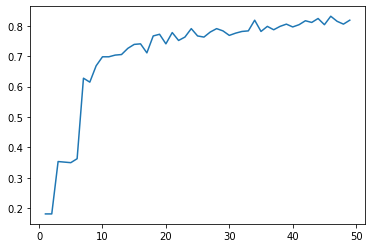

In [6]:
clfArray = []
clfResults = []
for i in range (1,50):
    clfArray.append(MLPClassifier(hidden_layer_sizes=i, activation='tanh', solver='sgd', batch_size=1, alpha=1, learning_rate='adaptive', verbose=1))
    clfArray[i-1].fit(X_train,y_train)
    clfResults.append(clfArray[i-1].score(X_test,y_test))


## Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance

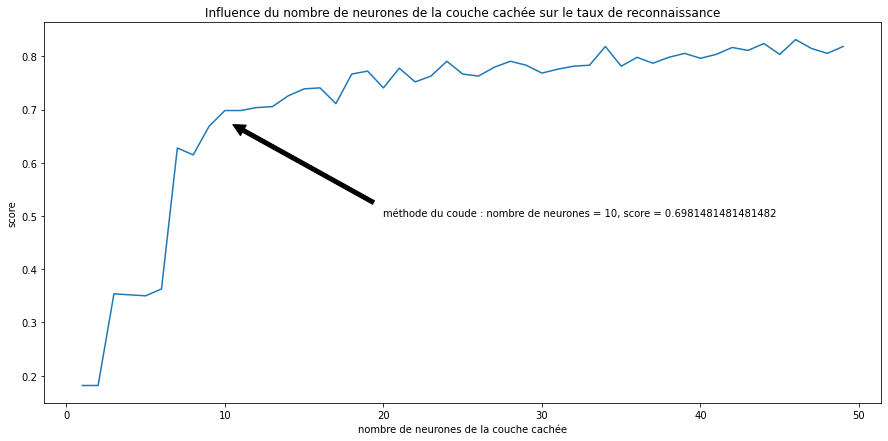

In [101]:
plt.figure(figsize=(15,7))
plt.title("Influence du nombre de neurones de la couche cachée sur le taux de reconnaissance")
plt.ylabel('score')
plt.xlabel('nombre de neurones de la couche cachée')
plt.annotate('méthode du coude : nombre de neurones = 10, score = ' + str(clfResults[10]) , xy= (10,0.68), xytext=( 20,0.5) ,arrowprops=dict(facecolor='black', shrink=0.05),)

plt.plot(list(range(1,50)),clfResults)

# Cross-validation

In [106]:
clfCV = MLPClassifier(hidden_layer_sizes=10, activation='tanh',validation_fraction=0.2, solver='sgd', batch_size=1, alpha=1, learning_rate='adaptive', verbose=1)
clfCV.fit(X_train,y_train)
clfCV.score(X_test,y_test)

Iteration 1, loss = 2.88915254
Iteration 2, loss = 2.22628645
Iteration 3, loss = 2.22348970
Iteration 4, loss = 2.22219160
Iteration 5, loss = 2.22283714
Iteration 6, loss = 2.22155834
Iteration 7, loss = 2.22253966
Iteration 8, loss = 2.22426942
Iteration 9, loss = 2.22437272
Iteration 10, loss = 2.21829154
Iteration 11, loss = 2.22446723
Iteration 12, loss = 2.22038185
Iteration 13, loss = 2.22275631
Iteration 14, loss = 2.21817294
Iteration 15, loss = 2.22217025
Iteration 16, loss = 2.22428062
Iteration 17, loss = 2.22473520
Iteration 18, loss = 2.22111026
Iteration 19, loss = 2.22290786
Iteration 20, loss = 2.22178390
Iteration 21, loss = 2.21787305
Iteration 22, loss = 2.22101235
Iteration 23, loss = 2.22335784
Iteration 24, loss = 2.22265299
Iteration 25, loss = 2.22185218
Iteration 26, loss = 2.21628130
Iteration 27, loss = 2.22427480
Iteration 28, loss = 2.21708072
Iteration 29, loss = 2.22332120
Iteration 30, loss = 2.22115042
Iteration 31, loss = 2.22288292
Iteration 32, los

0.6037037037037037